In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#Data Exploration
data = pd.read_csv("https://raw.githubusercontent.com/marcopaulo01/computer_games_data/main/computer_games.csv")
print(data.columns.values)
print(data.shape)
print(data.describe())
print(data.dtypes) 
print(data.head(5))
print(data.isnull().sum())

['Name' 'Developer' 'Producer' 'Genre' 'Operating System' 'Date Released']
(1095, 6)
                 Name Developer         Producer                 Genre  \
count            1095      1095             1095                  1095   
unique           1094       583              489                   282   
top     A Hat in Time     Maxis  Electronic Arts  First-person shooter   
freq                2        30               84                   103   

         Operating System Date Released  
count                1095          1095  
unique                 83           915  
top     Microsoft Windows          1995  
freq                  600             9  
Name                object
Developer           object
Producer            object
Genre               object
Operating System    object
Date Released       object
dtype: object
                                 Name                        Developer  \
0                             A-Men 2                     Bloober Team   
1         

In [3]:
#Data Cleaning

genres = data['Genre'].str.split(', ')
individual_genre = []
for entry in genres:
    individual_genre.extend(entry)
for i in range(len(individual_genre)):
    if individual_genre[i].lower() == "rts":
        individual_genre[i] = "real-time strategy"
for i in range(len(individual_genre)):
    if individual_genre[i].lower() == "action-adventure":
        individual_genre[i] = "adventure"
for i in range(len(individual_genre)):
    if individual_genre[i].lower() == "rpg" or individual_genre[i].lower() == "action role-playing" or individual_genre[i].lower() == "action rpg":
        individual_genre[i] = "role-playing"
for i in range(len(individual_genre)):
    if individual_genre[i].lower() == "life simulation":
        individual_genre[i] = "simulation"
individual_genre = [genre.lower() for genre in individual_genre]
genre = pd.DataFrame({'Genre':individual_genre}).value_counts().reset_index(name='Count')

operating_system = data['Operating System'].str.split(', ')
individual_os = []
for entry in operating_system:
    individual_os.extend(entry)
individual_os = [os.lower() for os in individual_os]
os = pd.DataFrame({'OS':individual_os}).value_counts().reset_index(name='Count')


year_released  =  data['Date Released'].str[-4:]
release = pd.DataFrame({'Year Released':year_released}).value_counts().reset_index(name='Count')

producers = data['Producer'].str.split(', ')
individual_producer = []
for entry in producers:
    individual_producer.extend(entry)
producer = pd.DataFrame({'Producer':individual_producer}).value_counts().reset_index(name='Count')

<Figure size 640x480 with 0 Axes>

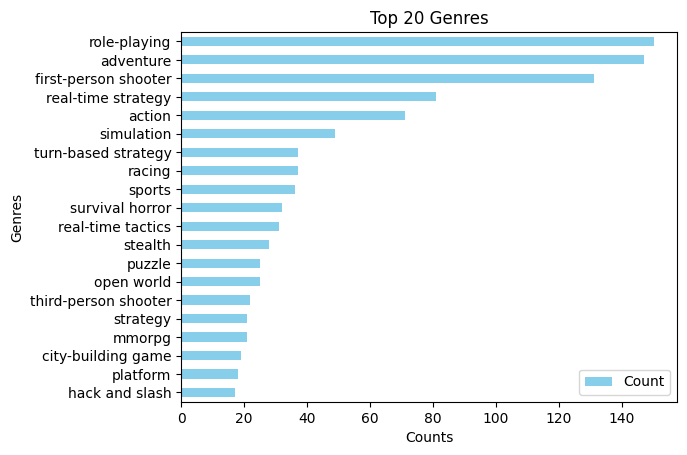

In [4]:
#Data Visualization top 20 Genres
top_genre = genre.head(20).sort_values(by='Count', ascending=True)
plt.figure()
top_genre.plot(kind='barh', color='skyblue', y='Count', x='Genre')
plt.xlabel('Counts')
plt.ylabel('Genres')
plt.title('Top 20 Genres')
plt.show()

<Figure size 640x480 with 0 Axes>

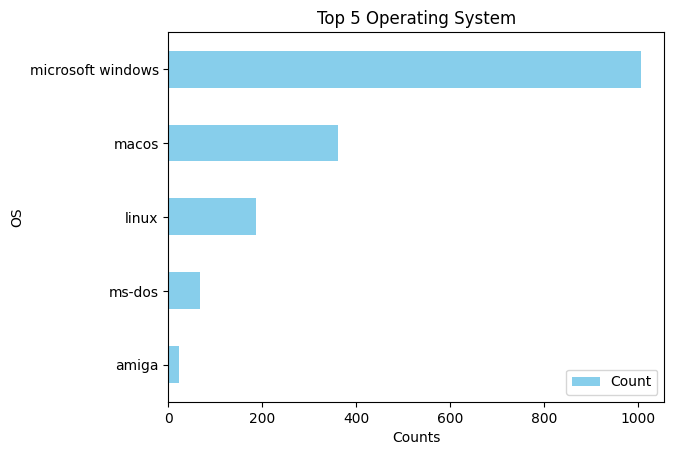

In [5]:
#Data Visualization top 5 Operating System
top_os = os.head(5).sort_values(by='Count', ascending=True)
plt.figure()
top_os.plot(kind='barh', color='skyblue', y='Count', x='OS')
plt.xlabel('Counts')
plt.ylabel('OS')
plt.title('Top 5 Operating System')
plt.show()

<Figure size 640x480 with 0 Axes>

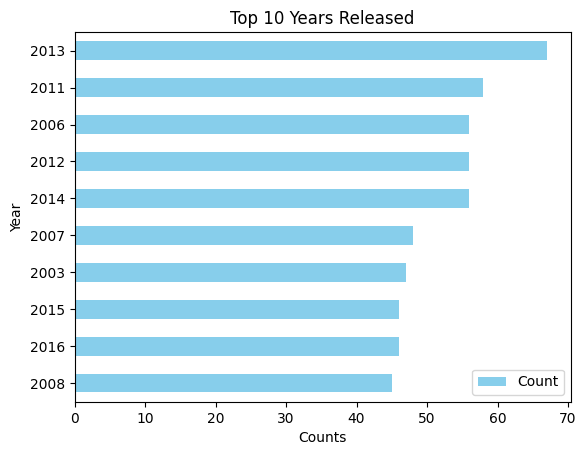

In [6]:
#Data Visualization top 10 years
top_release = release.head(10).sort_values(by='Count', ascending=True)
plt.figure()
top_release.plot(kind='barh', color='skyblue', y='Count', x='Year Released')
plt.xlabel('Counts')
plt.ylabel('Year')
plt.title('Top 10 Years Released')
plt.show()

<Figure size 640x480 with 0 Axes>

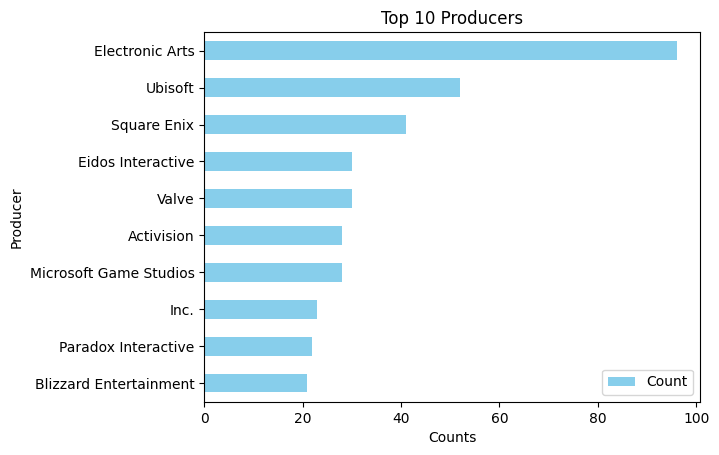

In [8]:
#Data Vizualization top 10 Producers
top_producer = producer.head(10).sort_values(by='Count', ascending=True)
plt.figure()
top_producer.plot(kind='barh', color='skyblue', y='Count', x='Producer')
plt.xlabel('Counts')
plt.ylabel('Producer')
plt.title('Top 10 Producers')
plt.show()

In [ ]:
#code for power bi
'''
import pandas as pd

def process_data():
    # Load data from CSV file
    data = pd.read_csv("https://raw.githubusercontent.com/marcopaulo01/computer_games_data/main/computer_games.csv")

    # Process genres
    genres = data['Genre'].str.split(', ')
    individual_genre = [genre.lower() for entry in genres for genre in entry]
    replace_mapping = {"rts": "real-time strategy", "action-adventure": "adventure", "rpg": "role-playing", 
                       "action role-playing": "role-playing", "action rpg": "role-playing", "life simulation": "simulation"}
    individual_genre = [replace_mapping.get(genre, genre) for genre in individual_genre]
    genre = pd.DataFrame({'Genre': individual_genre}).value_counts().reset_index(name='Count')

    # Process operating systems
    operating_system = data['Operating System'].str.split(', ')
    individual_os = [os.lower() for entry in operating_system for os in entry]
    os = pd.DataFrame({'OS': individual_os}).value_counts().reset_index(name='Count')

    # Process release years
    year_released = data['Date Released'].str[-4:]
    release = pd.DataFrame({'Year Released': year_released}).value_counts().reset_index(name='Count')

    # Process producers
    producers = data['Producer'].str.split(', ')
    individual_producer = [producer.lower() for entry in producers for producer in entry]
    producer = pd.DataFrame({'Producer': individual_producer}).value_counts().reset_index(name='Count')

    return genre, os, release, producer

# Call the function
result_genre, result_os, result_release, result_producer = process_data()
'''
